In [1]:
import qsharp
import numpy as np

In [2]:
%%qsharp

    open Microsoft.Quantum.Canon;
    open Microsoft.Quantum.Intrinsic;
    open Microsoft.Quantum.Measurement;
    open Microsoft.Quantum.Arrays;
    open Microsoft.Quantum.Convert;
    open Microsoft.Quantum.Diagnostics;
    

    operation BernsteinVaziraniImplementation( n: Int, parity : Int) : Int{

        let pattern = IntAsBoolArray(parity, n);

        use qubits = Qubit[n + 1];

        X(qubits[n]);
        
        DumpMachine();

        ApplyToEach(H, qubits);
        
        DumpMachine();

        let UnitaryFunction = ParityOperation(pattern);
        UnitaryFunction(qubits);
        
        DumpMachine();

        ApplyToEach(H, qubits[0 .. n - 1]);
        
        DumpMachine();

        let resultArray = ForEach(M, qubits);
        let resultBoolean = ResultArrayAsBoolArray(resultArray);
        let resultInteger = BoolArrayAsInt(resultBoolean);

        Reset(qubits[n]);

        return resultInteger;
    }

    operation ParityOperationImplementation(pattern : Bool[], qs : Qubit[]) : Unit{
        let n = Length(pattern);
        for index in 0 .. n - 1{
            if(pattern[index]){
                Controlled X([qs[index]], qs[n]);
            }
        }
    }

    operation ParityOperation(pattern : Bool[]) : (Qubit[] => Unit){
        return ParityOperationImplementation(pattern, _);
    }

    @EntryPoint()
    operation MainFunction() : Unit {
        let n = 1;
        let parity = 1;
        let measuredParity = BernsteinVaziraniImplementation(n, parity);
        Message($"The actual parity is {parity}");
        Message($"The measured parity is {measuredParity}");
    }


In [3]:
MainFunction.simulate()

|0⟩	0 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	1 + 0𝑖
|3⟩	0 + 0𝑖

|0⟩	0.5000000000000001 + 0𝑖
|1⟩	0.5000000000000001 + 0𝑖
|2⟩	-0.5000000000000001 + 0𝑖
|3⟩	-0.5000000000000001 + 0𝑖

|0⟩	0.5000000000000001 + 0𝑖
|1⟩	-0.5000000000000001 + 0𝑖
|2⟩	-0.5000000000000001 + 0𝑖
|3⟩	0.5000000000000001 + 0𝑖

|0⟩	-2.299347170293093E-17 + 0𝑖
|1⟩	0.7071067811865477 + 0𝑖
|2⟩	2.299347170293093E-17 + 0𝑖
|3⟩	-0.7071067811865477 + 0𝑖

The actual parity is 1
The measured parity is 1


()

In [4]:
with qsharp.capture_diagnostics() as diagnostics:
    MainFunction.simulate()
print(diagnostics)

The actual parity is 1
The measured parity is 3
[{'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1], 'n_qubits': 2, 'amplitudes': {'0': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '1': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, '2': {'Real': 1.0, 'Imaginary': 0.0, 'Magnitude': 1.0, 'Phase': 0.0}, '3': {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}}}, {'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1], 'n_qubits': 2, 'amplitudes': {'0': {'Real': 0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 0.0}, '1': {'Real': 0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 0.0}, '2': {'Real': -0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 3.141592653589793}, '3': {'Real': -0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 3.141592653589793}}}, {'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1], 'n_qub

In [5]:
firstAmplitudes = []
value1 = diagnostics[0]['amplitudes']['0']['Real']
firstAmplitudes.append(value1)

value2 = diagnostics[0]['amplitudes']['1']['Real']
firstAmplitudes.append(value2)

value3 = diagnostics[0]['amplitudes']['2']['Real']
firstAmplitudes.append(value3)

value4 = diagnostics[0]['amplitudes']['3']['Real']
firstAmplitudes.append(value4)

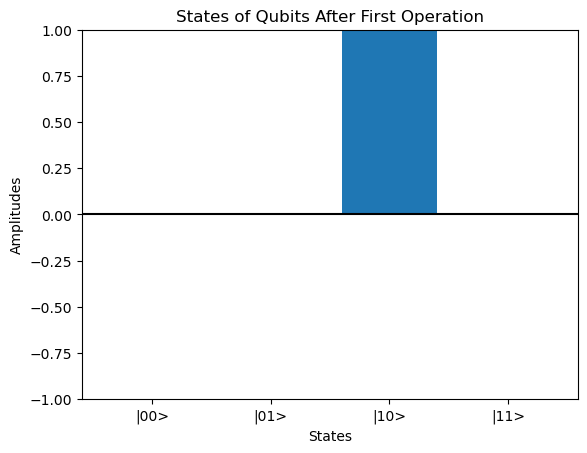

In [6]:
import matplotlib.pyplot as plt

states = ['|00>', '|01>', '|10>', '|11>']

figure_FirstDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, firstAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After First Operation')
plt.show()

In [7]:
secondAmplitudes = []
value5 = diagnostics[1]['amplitudes']['0']['Real']
secondAmplitudes.append(value5)

value6 = diagnostics[1]['amplitudes']['1']['Real']
secondAmplitudes.append(value6)

value7 = diagnostics[1]['amplitudes']['2']['Real']
secondAmplitudes.append(value7)

value8 = diagnostics[1]['amplitudes']['3']['Real']
secondAmplitudes.append(value8)

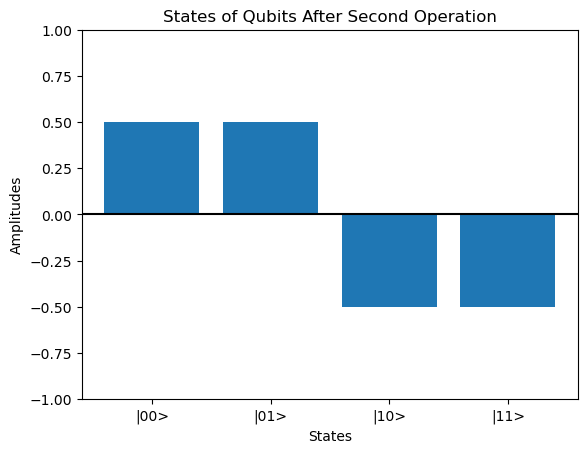

In [8]:
figure_SecondDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, secondAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Second Operation')
plt.show()

In [9]:
thirdAmplitudes = []
value9 = diagnostics[2]['amplitudes']['0']['Real']
thirdAmplitudes.append(value9)

value10 = diagnostics[2]['amplitudes']['1']['Real']
thirdAmplitudes.append(value10)

value11 = diagnostics[2]['amplitudes']['2']['Real']
thirdAmplitudes.append(value11)

value12 = diagnostics[2]['amplitudes']['3']['Real']
thirdAmplitudes.append(value12)

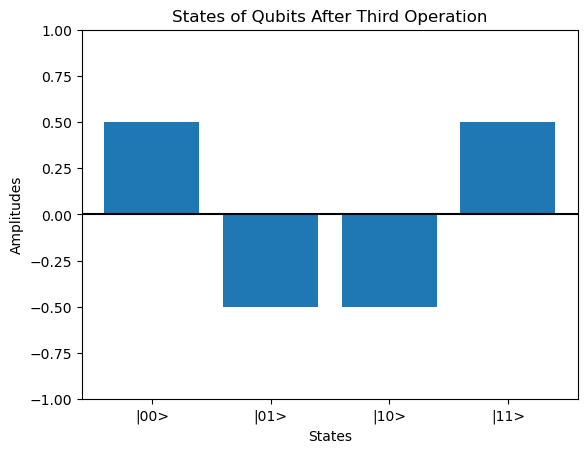

In [10]:
figure_ThirdDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, thirdAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Third Operation')
plt.show()

In [11]:
fourthAmplitudes = []
value13 = diagnostics[3]['amplitudes']['0']['Real']
fourthAmplitudes.append(value13)

value14 = diagnostics[3]['amplitudes']['1']['Real']
fourthAmplitudes.append(value14)

value15 = diagnostics[3]['amplitudes']['2']['Real']
fourthAmplitudes.append(value15)

value16 = diagnostics[3]['amplitudes']['3']['Real']
fourthAmplitudes.append(value16)

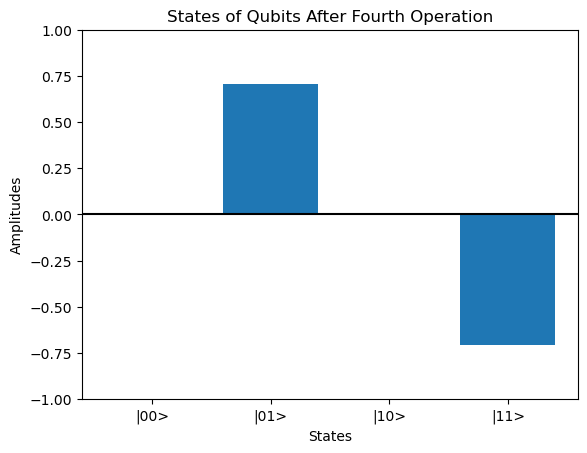

In [12]:
figure_FourthDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, fourthAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Fourth Operation')
plt.show()